In [1]:
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import scipy.io
import os
import csv
import random
import cv2
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import math
from frame import FLCDataset

In [2]:
import os
import csv
import cv2
from frame import FLCDataset, visualize_transformed_image

In [3]:
# 定义转换操作
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),  # 将PIL图像或NumPy ndarray转换为FloatTensor。
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # 标准化，使用ImageNet的均值和标准差
                         std=[0.229, 0.224, 0.225])
])


def label_transform(label, img_size):
    # 目标尺寸
    nh, nw = 224, 224
    # 原始尺寸
    h, w = img_size
    # 计算缩放比例
    x_scale = nw / w
    y_scale = nh / h
    
    # 处理标签中的每个坐标
    transformed_label = []
    for i, value in enumerate(label):
        if i % 2 == 0:  # 偶数索引位置，x坐标
            transformed_label.append(value * x_scale)
        else:  # 奇数索引位置，y坐标
            transformed_label.append(value * y_scale)
            
    return transformed_label



In [4]:
dataset = FLCDataset(r"C:\Users\lucyc\Desktop\face_loc_dataset.csv", r"C:\Users\lucyc\Desktop\face_loc_d", transform, label_transform)

In [40]:
data_loader = DataLoader(dataset, batch_size=4, shuffle=False)
data = iter(data_loader)

In [75]:
a, b = next(data)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


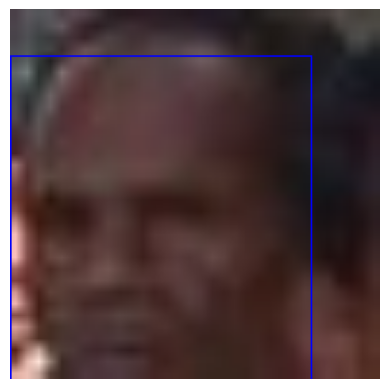

In [76]:
visualize_transformed_image(a[0], [int(float(x)//1) for x in b[0].split()], None)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


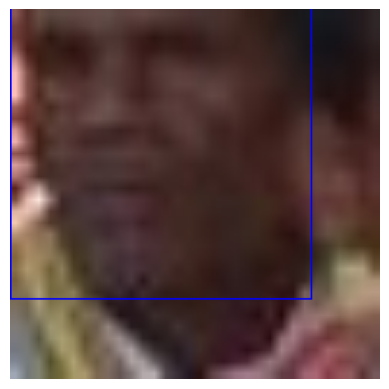

In [77]:
visualize_transformed_image(a[1], [int(float(x)//1) for x in b[1].split()], None)

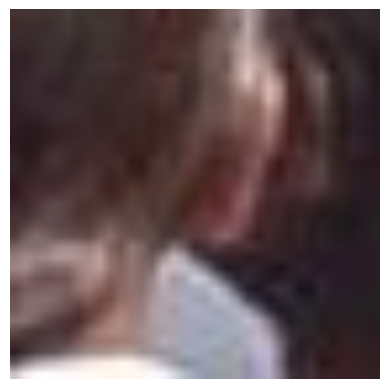

In [78]:
visualize_transformed_image(a[2], [int(float(x)//1) for x in b[2].split()], None)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


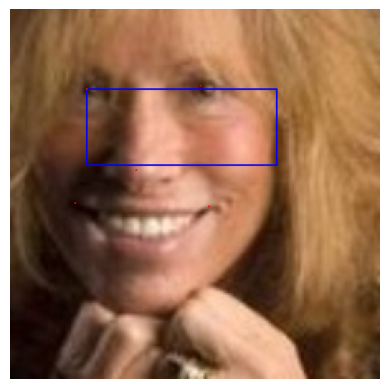

In [79]:
visualize_transformed_image(a[3], [int(float(x)//1) for x in b[3].split()], [int(float(x)//1) for x in b[3].split()])

In [14]:

def read_csv_file(file_path):
    """
    read the csv file
    :param file_path: the path of the csv file
    :return: the list of the csv file
    """
    with open(file_path, 'r') as f:
        reader = csv.reader(f)
        lines = list(reader)
    return lines


In [15]:
f = read_csv_file(r"C:\Users\lucyc\Desktop\face_loc_dataset.csv")

In [16]:
len(f)

49623

In [18]:
f[0]

['0',
 '0 0 45 61',
 '1',
 '-9 0 45 61',
 '2',
 '114 0 45 61',
 '3',
 '39 40 79 41 51 65 40 79 80 81']

In [19]:
def to_path(i):
    path = r"C:\Users\lucyc\Desktop\face_loc_d" + "\\" + str(i) + ".jpg"
    return path

In [31]:
i = 999

In [32]:
c = to_path(f[i][6])
c

'C:\\Users\\lucyc\\Desktop\\face_loc_d\\3999.jpg'

In [33]:
b = [[int(x) for x in f[i][7].split()]]
b

[[26, 40, 66, 39, 32, 59, 25, 81, 65, 77]]

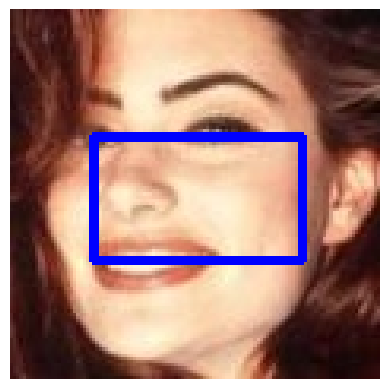

In [34]:
show_img_dir(c,b,None)

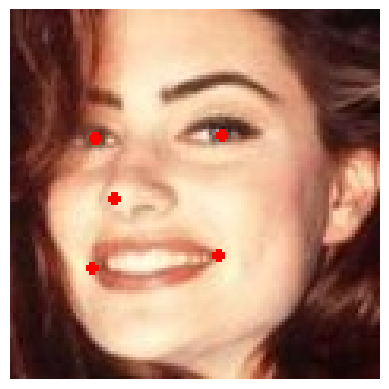

In [35]:
show_img_dir(c,[], b)

In [24]:
def show_img_dir(path, bbox, landmark):
    img = cv2.imread(path,1)
    for b in bbox:
        # 在图片上画矩形框，参数分别是：图片、左上角坐标、右下角坐标、颜色（BGR格式）、线条厚度
        img = cv2.rectangle(img, (b[0], b[1]), (b[0]+b[2], b[1]+b[3]), (255, 0, 0), 2)

    if landmark != None:
        landmark = landmark[0]
        for x, y in [(landmark[i],landmark[i+1]) for i in range(0,len(landmark),2)]:
            img = cv2.rectangle(img, (x,y), (x+1,y+1), (0, 0, 255), 2)
                
    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')  # 不显示坐标轴
    plt.show()
    
def show_img(img, bbox, landmark):
    for b in bbox:
        # 在图片上画矩形框，参数分别是：图片、左上角坐标、右下角坐标、颜色（BGR格式）、线条厚度
        img = cv2.rectangle(img, (b[0], b[1]), (b[0]+b[2], b[1]+b[3]), (255, 0, 0), 2)

    if landmark != None:
        landmark = landmark[0]
        for x, y in [(landmark[i],landmark[i+1]) for i in range(0,len(landmark),2)]:
            img = cv2.rectangle(img, (x,y), (x+1,y+1), (0, 0, 255), 2)
                
    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')  # 不显示坐标轴
    plt.show()

In [327]:
# 定义转换操作
transform = transforms.Compose([
    transforms.Resize(12),
    transforms.CenterCrop(12),
    transforms.ToTensor(),  # 将PIL图像或NumPy ndarray转换为FloatTensor。
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # 标准化，使用ImageNet的均值和标准差
                         std=[0.229, 0.224, 0.225])
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


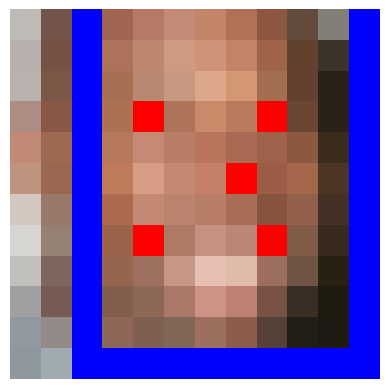

In [440]:
visualize_transformed_image(r[sample_index][1], r[sample_index][2], r[sample_index][3])

In [347]:
r[sample_index][2]

[0, 0, 7, 11]

In [307]:

def unnormalize(tensor, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]):
    """反标准化PyTorch tensor图像"""
    for t, m, s in zip(tensor, mean, std):  # 对每个通道进行操作
        t.mul_(s).add_(m)  # 对应于 (x * std) + mean
    return tensor

def visualize_transformed_image(tensor_image, bbox, landmark, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]):
    """
    反标准化并可视化PyTorch tensor图像。
    
    Parameters:
    - tensor_image: PyTorch tensor，代表经过transform变换的图像。
    - mean: 标准化时使用的均值，应与transform操作中的均值相对应。
    - std: 标准化时使用的标准差，应与transform操作中的标准差相对应。
    """
    # 克隆图像tensor以避免修改原始数据，并进行反标准化处理
    unnormalized_image = unnormalize(tensor_image.clone().detach(), mean, std)
    
    # 将tensor图像转换为NumPy数组，并调整形状为HxWxC以适应matplotlib
    img = unnormalized_image.numpy().transpose((1, 2, 0))

    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

    b = bbox
    # 在图片上画矩形框，参数分别是：图片、左上角坐标、右下角坐标、颜色（BGR格式）、线条厚度
    img = cv2.rectangle(img, (b[0], b[1]), (b[0]+b[2], b[1]+b[3]), (255, 0, 0), 1)

    if landmark != None:
        for x, y in [(landmark[i],landmark[i+1]) for i in range(0,len(landmark),2)]:
            img = cv2.rectangle(img, (x,y), (x,y), (0, 0, 255), 1)
            
    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')  # 不显示坐标轴
    plt.show()
    

In [8]:
path, bbox, landmark = cead.get_data(70)
path2, bbox2, landmark2 = wfd.get_data(70)

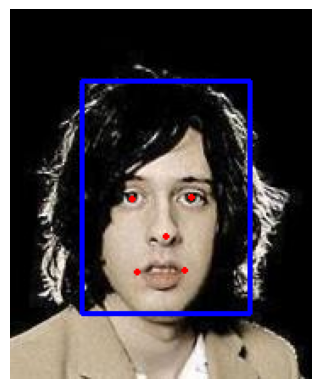

In [245]:
show_img(path, bbox, landmark)

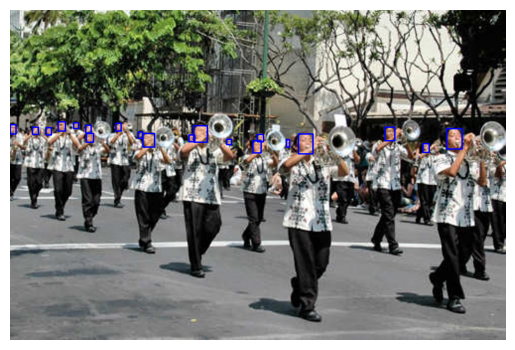

In [246]:
show_img(path2, bbox2, landmark2)